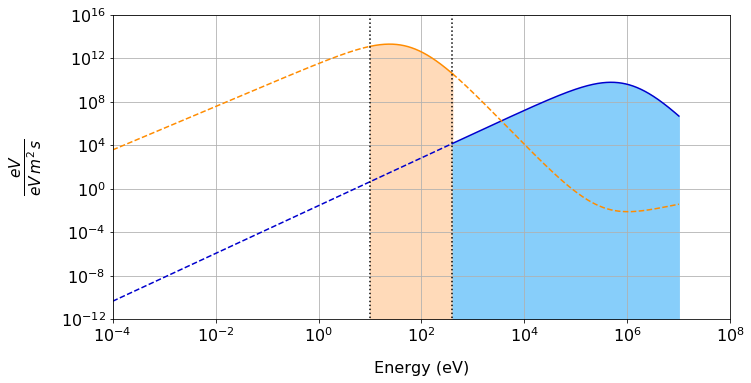

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
import scipy.special
from scipy.special import gamma
plt.rcParams['axes.titlesize'] = 20  
plt.rcParams['axes.labelsize'] = 16  
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.titlepad'] = 30 
plt.rcParams['axes.labelpad'] = 16 


#Kappa distribution for low energy
def f_kap(v, n, w, kappa):
    return (n*scipy.special.gamma(kappa + 1)/(((w*np.sqrt(np.pi*kappa))**3)*scipy.special.gamma(kappa - 0.5)))*(1 + (v**2)/(kappa*(w**2)))**(-kappa - 1) #cm^-6 s^3

#distribution for high energy
def j(j_0, E, a, b, E_0):
    return (j_0*E**a) * (1 + E/E_0)**b     #keV^-1 cm^-2 s^-1 sr^-1
    
#set the values for energy
E = np.logspace(-4, 7, 10000) #eV
N_E = len(E)
dE = np.zeros(N_E-1)
for i in range (0, N_E - 1):
    dE[i] = E[i+1] - E[i]       
    
#Constants
k = 1.381 * 10**-16 #cm^2 g s^-2 K
m_e = 9.109 * 10**-28 #g
m_p = 1.661 * 10**-24 #g
k_b = 8.617 * 10**-5 #ev/K
erg = 6.2415*10**11 #eV/erg
c = 3.0 * 10**10 #cm/s
    
#Electrons - Ben    
kappa = 6
Te_low = 10/erg #erg
ne_low = (7.55 * 10**7)/(100**3) #cm^-3

#Calculate velocities
w_low = np.sqrt(2*Te_low/m_e) #cm/s
v_low = c*np.sqrt(1 - 1/(((E/erg)/(m_e*c**2) + 1)**2))

j_low = np.pi * (v_low*v_low/m_e) * f_kap(v_low,ne_low,w_low,kappa)* (100**2)/erg #get rid of sr^-1, then cm^2 s^-2 g^-1 * cm^-6 s^3 = s cm^-4 g^-1 = erg^-1 s^-1 cm^-2 * cm^2/m^2 * erg/eV = eV^-1 m^-2 s^-1

#high energy
j_0 = 14000 #/keV cm^2 s sr
E_0 = 1.05
a = 1.2
b = -7

j_high = np.pi * ((10**4)/1000) * j(j_0, (E*10**-6), a, b, E_0) #converts cm^-2 to m^-2 and keV to eV

y_lower = np.zeros(6002-4545)
y_lower[:] = 10**-12

y_higher = np.zeros(10000-6002)
y_higher[:] = 10**-12

fig1 = plt.figure(1)
fig1.set_figheight(6.5)
fig1.set_figwidth(11)
plt.clf()
#Low energy end - will not make anything
plt.loglog(E[0:6002], E[0:6002]*j_high[0:6002], linestyle = '--', color = 'mediumblue')
plt.loglog(E[0:4545], E[0:4545]*j_low[0:4545], linestyle = '--', color = 'darkorange')
#O2 Range
plt.loglog(E[4545:6002], E[4545:6002]*j_low[4545:6002], label = 'low energy (kappa dist.)', color = 'darkorange')
#H2O2 range
plt.loglog(E[6002:], E[6002:]*j_high[6002:], label = 'high energy (Paranicas 2012)', color = 'mediumblue')
plt.loglog(E[6002:], E[6002:]*j_low[6002:], linestyle = '--', color = 'darkorange')
#Low energy limit to make O2
plt.plot([10,10], [10**-13,10**17], 'k:')
plt.plot([400,400], [10**-13,10**17], 'k:')
#plt.loglog(E, j_low + j_high, label = 'total')
plt.fill_between(E[4545:6002], y_lower, E[4545:6002]*j_low[4545:6002], color = 'peachpuff')
plt.fill_between(E[6002:], y_higher, E[6002:]*j_high[6002:], color = 'lightskyblue')
plt.xlabel('Energy (eV)')
plt.ylabel(r'$\frac{eV}{eV\/m^{2}\/s}$', size = 22)
#plt.title('Electron Distribution')
plt.xlim(10**-4, 10**8)
plt.ylim(10**-12, 10**16)
plt.subplots_adjust(left=0.15, right=0.93, top=0.8, bottom=0.15)
#plt.legend(bbox_to_anchor=(0.57,0.8),prop={'size': 13})
plt.grid()
plt.savefig('ElectronDistPUB.png')



In [137]:
#Define as functions of E only for integrating
def f_kapnoE(n, w, kappa):
    return (n*scipy.special.gamma(kappa + 1)/(((w*np.sqrt(np.pi*kappa))**3)*scipy.special.gamma(kappa - 0.5)))
#*(1 + (v**2)/(kappa*(w**2)))**(-kappa - 1) #cm^-6 s^3

def v(E):
    return c*np.sqrt(1 - 1/(((E/erg)/(m_e*c**2) + 1)**2))

def j_lownoE(E):
    return E * np.pi * (v(E)*v(E)/m_e) * f_kapnoE(ne_low,w_low,kappa)*((1 + (v(E)**2)/(kappa*(w_low**2)))**(-kappa - 1))*((100**2)/erg)

def j_highnoE(E):
    return E * np.pi * ((10**4)/1000) * (j_0*(E*10**-6)**a) * (1 + (E*10**-6)/E_0)**b

In [ ]:
fig2 = plt.figure(2)
fig2.set_figheight(6.5)
fig2.set_figwidth(11)
plt.loglog(E, j_lownoE(E), label = 'low energy (kappa dist.)')
plt.loglog(E, j_highnoE(E), label = 'high energy (Paranicas 2012)')
plt.grid()
plt.xlabel('Energy (eV)')
plt.ylabel(r'$\frac{1}{eV\/m^{2}\/s}$', size = 22)
plt.title('Electron Distribution')
plt.xlim(10**-4, 10**8)
#plt.ylim(10**-12, 10**16)
plt.subplots_adjust(left=0.12, right=0.93, top=0.8, bottom=0.15)
plt.legend(bbox_to_anchor=(0.61,0.8),prop={'size': 13})
plt.show()

In [88]:
#E = np.ndarray.tolist(E)
j_high[0]

4.3982297120935632e-07

In [139]:
#Now integrate over the distribution * E to get energy flux

jval_low = np.zeros(N_E - 1)
jval_high = np.zeros(N_E - 1)
E_avg = np.zeros(N_E - 1)
for i in range(0, N_E-1):
    jval_low[i] = (np.log10(j_low[i+1]) + np.log10(j_low[i]))/2
    jval_high[i] = (np.log10(j_high[i+1]) + np.log10(j_high[i]))/2
    E_avg[i] = (np.log10(E[i+1]) + np.log10(E[i]))/2

E_high = np.sum((10**(E_avg))*(10**(jval_high))*dE) #eV * ev^-1 m^-2 
E_low = np.sum((10**(E_avg))*(10**(jval_low))*dE)

#E_low = scipy.integrate.quad(f_low, 0, 10**7)
    
    
        



In [110]:
E_high

8110367380337628.0

In [112]:
E_low

13466582770886572.0

In [141]:


y_low, errl = scipy.integrate.quad(j_lownoE, 10, 400)
y_high, errh = scipy.integrate.quad(j_highnoE, 400, 10**7)
print(y_low)
print(y_high)
print(y_high/y_low)

1285904364901914.8
8110375069390889.0
6.307137055258014
